# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [1]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4083860389.py, line 12)

### Defino la funcion a optimizar, un polinomio de grado 4

In [4]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

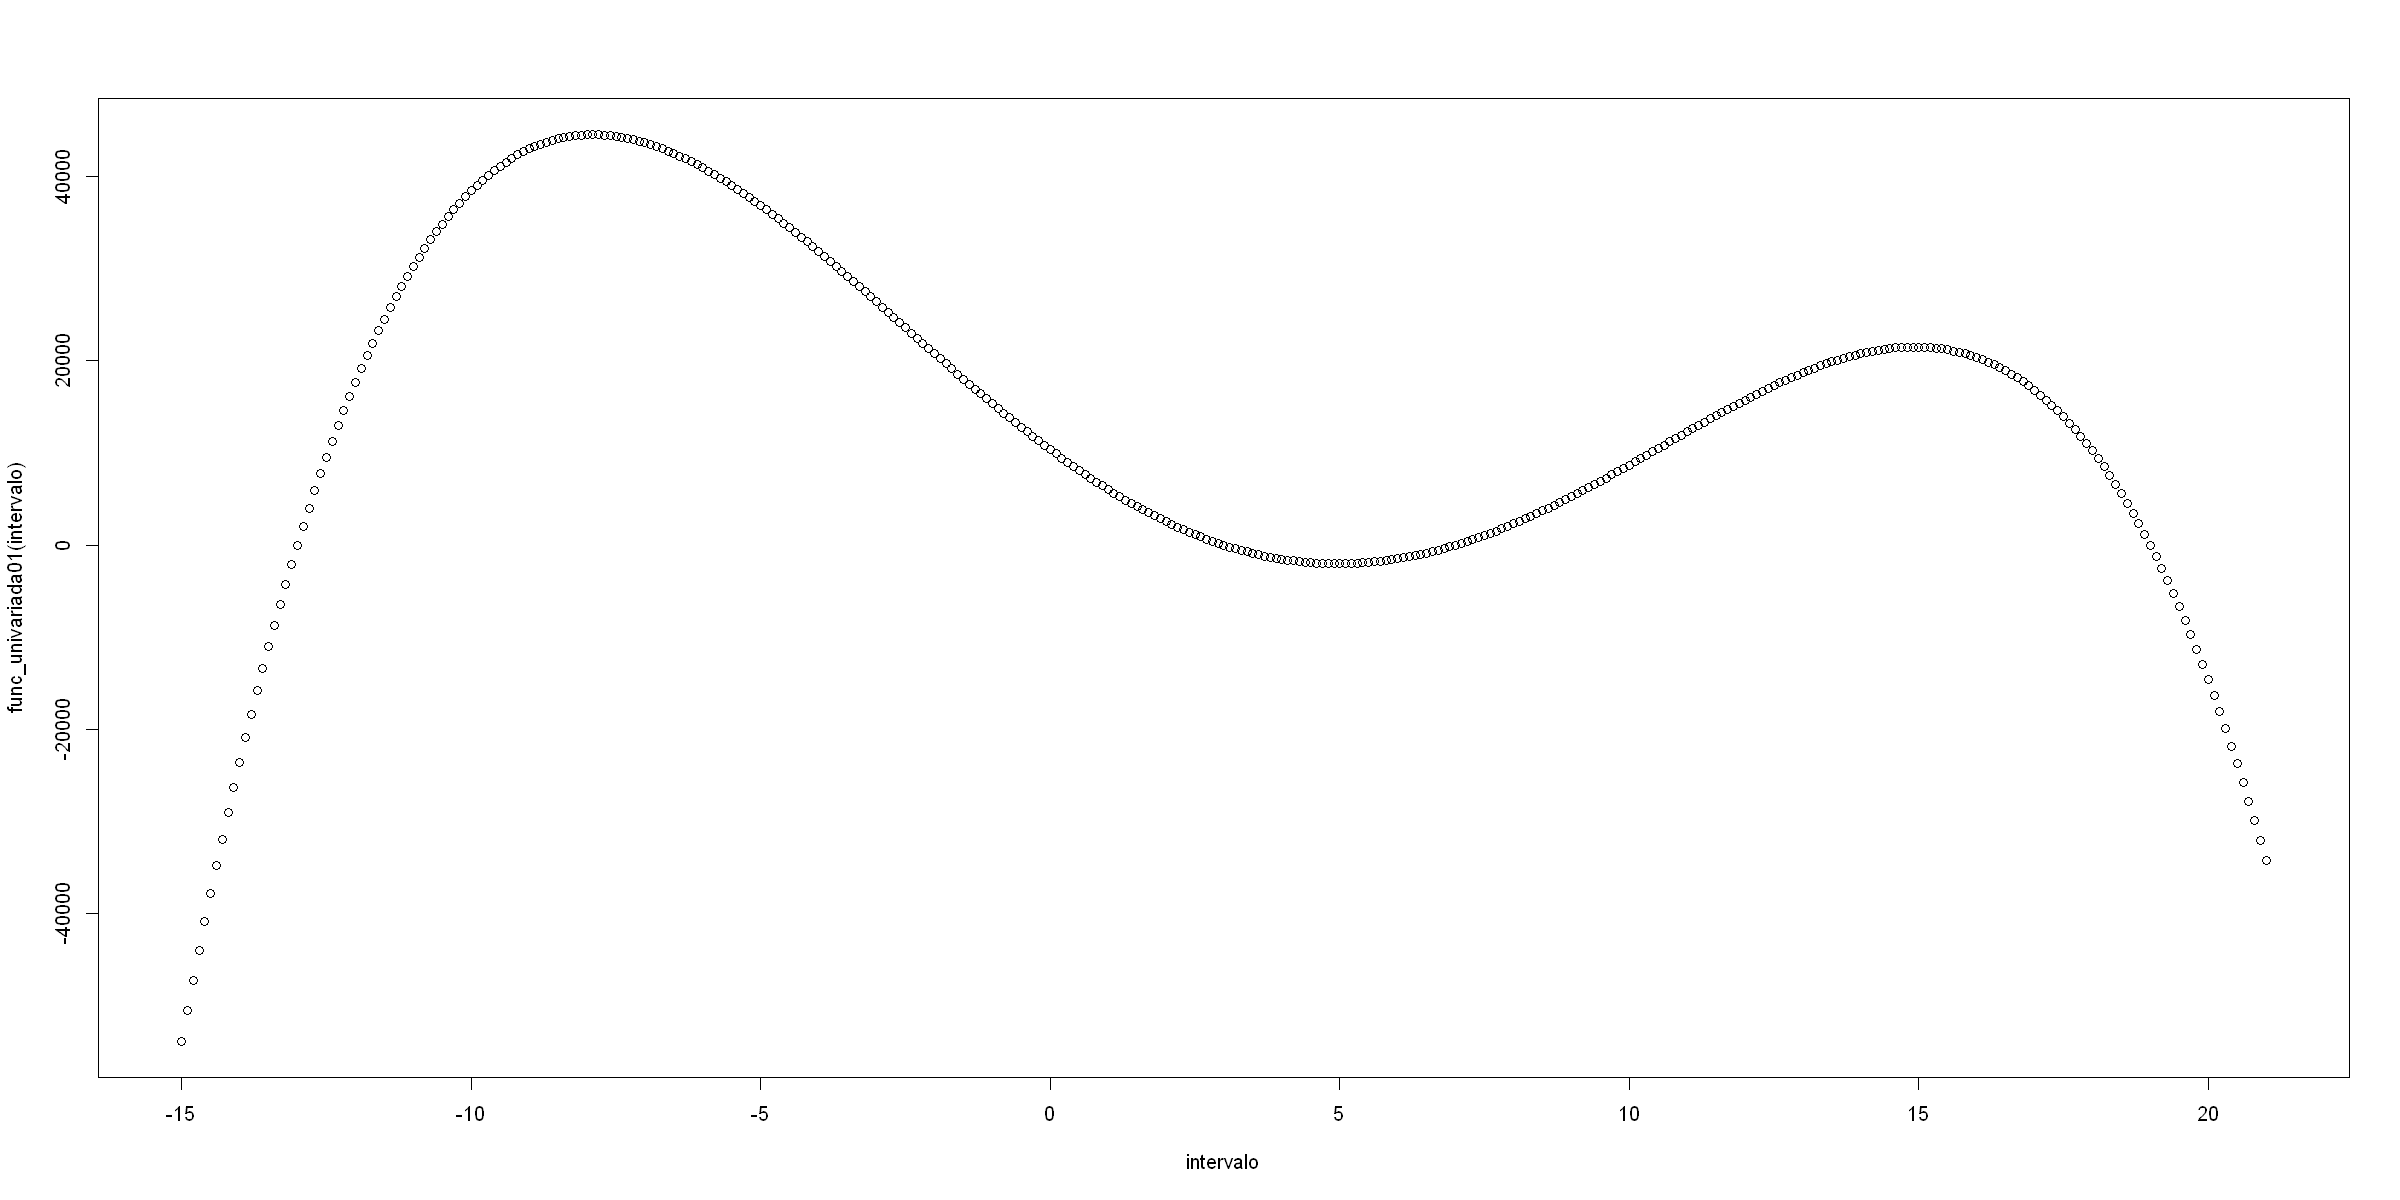

In [5]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [6]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [7]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [8]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [9]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=-58.8 : y = -2.9e+07 : 0.0 secs : initdesign

[mbo] 0: x=28.8 : y = -4.63e+05 : 0.0 secs : initdesign

[mbo] 0: x=63 : y = -2.25e+07 : 0.0 secs : initdesign

[mbo] 0: x=-3.04 : y = 2.66e+04 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -71.17216 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       71.172  |proj g|=    0.0050737
At iterate     1  f =       71.172  |proj g|=     0.0050764
ys=-1.401e-08  -gs= 2.574e-05, BFGS update SKIPPED
At iterate     2  f =       71.141  |proj g|=     0.0021641
At iterate     3  f =       71.138  |proj g|=    1.6142e-05
At iterate     4  f =       71.138  |proj g|=    4.9034e-07

iterations 4
function evaluations 11
segments explored during Cauchy searches 4
BFGS updates skipped 1
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.90337e-07
final function value 

[mbo] 1: x=12.8 : y = 1.81e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -87.93242 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       87.932  |proj g|=     0.013225
At iterate     1  f =       87.932  |proj g|=      0.013224
At iterate     2  f =       87.728  |proj g|=     0.0070493
Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.
At iterate     3  f =       87.713  |proj g|=     0.0051566
At iterate     4  f =       87.702  |proj g|=     0.0026055
At iterate     5  f =         87.7  |proj g|=    0.00050959
At iterate     6  f =         87.7  |proj g|=    3.9845e-05
At iterate     7  f =         87.7  |pr

[mbo] 2: x=3.85 : y = -1.37e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -102.8677 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       102.87  |proj g|=    0.0015017
At iterate     1  f =       102.87  |proj g|=     0.0015009
At iterate     2  f =       102.87  |proj g|=    0.00015766
At iterate     3  f =       102.87  |proj g|=    1.4451e-05
At iterate     4  f =       102.87  |proj g|=    1.2446e-07

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.24456e-07
final function value 102.866

F = 102.866
final  value 102.865627 
conver

[mbo] 3: x=21.3 : y = -4.16e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -117.7135 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       117.71  |proj g|=   6.7093e-05
At iterate     1  f =       117.71  |proj g|=     6.707e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.70705e-05
final function value 117.714

F = 117.714
final  value 117.713502 
converged


[mbo] 4: x=-0.0819 : y = 1.08e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -131.1706 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       131.17  |proj g|=    0.0012119
At iterate     1  f =       131.17  |proj g|=     0.0012117
At iterate     2  f =       131.17  |proj g|=    0.00020185
At iterate     3  f =       131.17  |proj g|=    2.7165e-05
At iterate     4  f =       131.17  |proj g|=     5.207e-07
At iterate     5  f =       131.17  |proj g|=    1.3762e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.37623e-09
final functio

[mbo] 5: x=8.59 : y = 3.99e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -144.5837 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       144.58  |proj g|=   0.00020308
At iterate     1  f =       144.58  |proj g|=    0.00020305

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000203055
final function value 144.584

F = 144.584
final  value 144.583686 
converged


[mbo] 6: x=-10.4 : y = 3.55e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -159.9088 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       159.91  |proj g|=   1.3247e-05
At iterate     1  f =       159.91  |proj g|=    1.3245e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.32451e-05
final function value 159.909

F = 159.909
final  value 159.908788 
converged


[mbo] 7: x=-7.45 : y = 4.43e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -173.095 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        173.1  |proj g|=   0.00046836
At iterate     1  f =        173.1  |proj g|=    0.00046833

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000468332
final function value 173.095

F = 173.095
final  value 173.095003 
converged


[mbo] 8: x=16.8 : y = 1.78e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -186.2278 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       186.23  |proj g|=   3.9338e-05
At iterate     1  f =       186.23  |proj g|=    3.9336e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.93357e-05
final function value 186.228

F = 186.228
final  value 186.227809 
converged


[mbo] 9: x=-9.04 : y = 4.29e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -198.0001 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=          198  |proj g|=   0.00037414
At iterate     1  f =          198  |proj g|=    0.00037412

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000374119
final function value 198

F = 198
final  value 198.000114 
converged


[mbo] 10: x=-5.35 : y = 3.84e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -209.9556 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       209.96  |proj g|=   0.00045195
At iterate     1  f =       209.96  |proj g|=    0.00045194

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000451937
final function value 209.956

F = 209.956
final  value 209.955570 
converged


[mbo] 11: x=24.5 : y = -1.54e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -222.8866 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       222.89  |proj g|=   0.00039211
At iterate     1  f =       222.89  |proj g|=    0.00039209

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000392094
final function value 222.887

F = 222.887
final  value 222.886557 
converged


[mbo] 12: x=-14.6 : y = -4.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -237.1194 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       237.12  |proj g|=   0.00066385
At iterate     1  f =       237.12  |proj g|=    0.00066382

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000663819
final function value 237.119

F = 237.119
final  value 237.119400 
converged


[mbo] 13: x=-12.5 : y = 1e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -249.1523 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       249.15  |proj g|=    0.0018325
At iterate     1  f =       249.15  |proj g|=     0.0018324
At iterate     2  f =       249.13  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 249.131

F = 249.131
final  value 249.131251 
converged


[mbo] 14: x=14.8 : y = 2.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -260.9896 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       260.99  |proj g|=    0.0023088
At iterate     1  f =       260.99  |proj g|=     0.0023086
At iterate     2  f =       260.97  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 260.972

F = 260.972
final  value 260.972108 
converged


[mbo] 15: x=6.26 : y = -1.18e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -273.1302 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       273.13  |proj g|=    0.0053587
At iterate     1  f =       273.13  |proj g|=     0.0053582
At iterate     2  f =       272.99  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 272.986

F = 272.986
final  value 272.985749 
converged


[mbo] 16: x=18.8 : y = 2.56e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -284.8369 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       284.84  |proj g|=    0.0036078
At iterate     1  f =       284.84  |proj g|=     0.0036076
At iterate     2  f =       284.82  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 284.821

F = 284.821
final  value 284.820738 
converged


[mbo] 17: x=10.8 : y = 1.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -296.5881 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       296.59  |proj g|=    0.0051984
At iterate     1  f =       296.59  |proj g|=      0.005198
At iterate     2  f =       296.52  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 296.516

F = 296.516
final  value 296.516252 
converged


[mbo] 18: x=-6.47 : y = 4.24e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -307.2532 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       307.25  |proj g|=    0.0049402
At iterate     1  f =       307.25  |proj g|=     0.0049398
At iterate     2  f =       307.24  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 307.241

F = 307.241
final  value 307.241302 
converged


[mbo] 19: x=-8.23 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -317.5494 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       317.55  |proj g|=    0.0060871
At iterate     1  f =       317.55  |proj g|=     0.0060865
At iterate     2  f =       317.51  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 317.507

F = 317.507
final  value 317.506756 
converged


[mbo] 20: x=1.78 : y = 3.24e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -329.1344 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       329.13  |proj g|=    0.0068567
At iterate     1  f =       329.13  |proj g|=     0.0068561
At iterate     2  f =       329.09  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 329.086

F = 329.086
final  value 329.086146 
converged


[mbo] 21: x=-4.28 : y = 3.33e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -339.9741 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       339.97  |proj g|=    0.0084681
At iterate     1  f =       339.97  |proj g|=     0.0084671
At iterate     2  f =       339.86  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 339.856

F = 339.856
final  value 339.855810 
converged


[mbo] 22: x=-1.66 : y = 1.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -350.954 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       350.95  |proj g|=    0.0081043
At iterate     1  f =       350.95  |proj g|=     0.0081034
At iterate     2  f =       350.92  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 350.918

F = 350.918
final  value 350.917519 
converged


[mbo] 23: x=-9.65 : y = 4.04e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -360.9603 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       360.96  |proj g|=    0.0091175
At iterate     1  f =       360.96  |proj g|=     0.0091164
At iterate     2  f =        360.9  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 360.899

F = 360.899
final  value 360.898878 
converged


[mbo] 24: x=-6.99 : y = 4.37e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -370.4872 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       370.49  |proj g|=     0.010579
At iterate     1  f =       370.49  |proj g|=      0.010578
At iterate     2  f =       370.36  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 370.363

F = 370.363
final  value 370.362548 
converged


[mbo] 25: x=-7.85 : y = 4.46e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  243.6391 
  - best initial criterion value(s) :  -379.5068 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       379.51  |proj g|=     0.010476
At iterate     1  f =       379.51  |proj g|=      0.010475
At iterate     2  f =       379.45  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 379.45

F = 379.45
final  value 379.449515 
converged


In [10]:
tb_resultados  <- as.data.table( run$opt.path )

In [11]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-58.79346573,-28966895.068,0,NA,NA,0.02,NA,NA,NA,initdesign,NA,NA,NA
28.82123275,-462859.395,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
63.02610189,-22513006.726,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-3.04087994,26628.817,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
12.76468215,18086.180,1,NA,NA,0.00,-3266142.322,NA,0.61,infill_ei,0.49,8567035.313,-280998.123
3.85207797,-1369.430,2,NA,NA,0.00,-969907.267,NA,0.06,infill_ei,0.53,1915230.547,408098.642
21.31183604,-41577.486,3,NA,NA,0.00,-689308.341,NA,0.06,infill_ei,0.61,1166292.936,421774.234
-0.08185126,10759.925,4,NA,NA,0.00,-157847.745,NA,0.05,infill_ei,0.56,289353.002,103379.588
8.58822527,3989.860,5,NA,NA,0.00,-111356.484,NA,0.07,infill_ei,0.66,288699.688,18910.443


In [12]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.850271,44559.26,25,NA,NA,0,-1483.248,NA,0.03,infill_ei,0.34,3557.64,44557.25


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?